# Bertrand's Paradox -- Method 4

## Generate Random Chords

- Choose a random point within the circle
- Choose a random angle  for a chord passing through that point
- Calculate the length of that chord

## Results

I limited my randomly chosen angles so that they were between -pi/2 and pi/2 since I was using the tangent function, and chords with angles between pi/2 and 2pi can be represented with angles in the range I chose. For example, the angles 3pi/4 and -pi/4 result in the same chord for a random point within the circle. I made sure that all the chosen points were within the circle, by calculating the distance between the origin and the random point, and only keeping the point if the distance was less than one.

I decided to calculate the lengths of the chords by calculating the linear equation of the chord, finding the two points where it intersects with the circle, and computing the distance between those two points. If the randomly chosen angle is equal to pi/2 or -pi/2, then the slope is undefined, and the intersection points would have the same x-coordinate values as the randomly chosen point. If the angle is equal to 0, the slope is 0, and the intersection points would have the same y-coordinate values as the chosen point. If the angle is neither of these exceptions, however, then slope is calculated between the random point and a point whose x-coordinate is the sum of the point's x-coordinate and 0.5 (y-coordinate = 0.5 tan(theta)).

After figuring out the slope of the line, I checked if the point was equal to the origin, because then the chord would just be a diameter, and its length would be equal to 2.0. For all other points, I established a step size, that I used to move "up" the chord and "down" the chord, starting at the randomly chosen point, until I found the two points where the chord intersects the circle. I then used the distance formula for those two points to calculate the length of the chord.

When graphing all the chords in the circle, there is a concentration of vertical chords around x = 0.5. I suspect that this is either caused by a graphing mistake, or due to the fact that I only chose angles that are between -pi/2 and pi/2. The probability of a chord length being greater than sqrt(3) for this method is about 0.69. This probability seems to vary by about 0.01, depending on which seed was used to randomly generate the data.

Method 1 had a probability of about 0.33, Method 2 had a probability of about 0.50, and Method 3 had a probability of about 0.25. I am a bit surprised that the probability for Method 4 is not closer to the probability to Method 3, since the way they both randomly chose chords is the most similar, in my opinion. Method 4's probability is closest to Method 2's probability, which could be because they both involve finding the intersection points between the chord and the circle using the linear equation of the chord. It may be that the more "steps" that are involved in finding the length of the randomly chosen chords, the higher the probability will be. However, it is difficult to quantify a "step," and the only evidence I can really see to this theory is that Method 1 has the fewest "steps" and lowest probability, and Method 4 seems to have the most "steps" and highest probability. (Though the number of "steps" for Method 4 could just be due to my poor programming skills.)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# number of points
n = 20000

# select random points in the circle
xi = []
yi = []
while len(xi) < n:
    x_maybe = np.random.uniform(-1, 1)
    y_maybe = np.random.uniform(-1, 1)
    radius = np.sqrt(x_maybe**2 + y_maybe**2)
    if radius < 1.0:
        xi.append(x_maybe)
        yi.append(y_maybe)

# select n random angles between negative pi/2 and pi/2
theta = np.random.uniform(-np.pi/2.0, np.pi/2.0, n)

chord_lengths = []
x1_list = []
y1_list = []
x2_list = []
y2_list = []

# print("checkpoint 1")

# calculate chord lengths for random points and angles
# find linear equation of chord, and move along it until point is outside circle
# move "up" the line, and "down" the line to find the two points which intersect with the circle
# apply distance formula to the two points to calculate length of chord
step_size = 0.001
for i in range(n):
    x = xi[i]
    y = yi[i]
    angle = theta[i]
    
    # print("checkpoint 2")
    if (angle == (np.pi / 2.0)) or (angle == (np.pi / -2.0)):
        # vertical chord, slope is undefined
        m = "undefined"
        # print("undefined")
    elif (angle == 0.0):
        # horizontal chord, slope is zero
        m = 0.0
        # print("zero slope")
    else:
        # calculate slope of chord
        m = (y - (0.5 * np.tan(angle))) / (x - 0.5)
        # print("slope: ", m)
    
    if (x == 0.0) and (y == 0.0):
        # point is at the origin, chord is a diameter
        intersection1 = [np.cos(angle), np.sin(angle)]
        intersection2 = [-np.sin(angle), -np.cos(angle)]
        L = 2.0
        # print("diameter chord")
    else:
        # find the points where the chord intersects the circle
        point1 = (x * x) + (y * y)
        point2 = (x * x) + (y * y)
        # vertical chord, x is unchanging
        if m == "undefined":
            # print("undefined while loop")
            y_above = y
            y_below = y
            while point1 <= 1.0:
                y_above += step_size
                point1 = (x * x) + (y_above * y_above)
            while point2 <= 1.0:
                y_below -= step_size
                point2 = (x * x) + (y_below * y_below)
            intersection1 = [x, (y_above - step_size)]
            intersection2 = [x, (y_below + step_size)]
            L = np.abs((y_above - step_size) - (y_below + step_size))
        # horizontal chord, y is unchanging
        elif m == 0.0:
            # print("zero slope while loop")
            x_above = x
            x_below = x
            while point1 <= 1.0:
                x_above += step_size
                point1 = (x_above * x_above) + (y * y)
            while point2 <= 1.0:
                x_below -= step_size
                point2 = (x_below * x_below) + (y * y)
            intersection1 = [(x_above - step_size), y]
            intersection2 = [(x_below + step_size), y]
            L = np.abs((x_above - step_size) - (x_below + step_size))
        # chord is at an angle and not through the origin
        else:
            # y = m(x - x1) + y1
            # print("nonzero slope while loop")
            x_above = x
            x_below = x
            y_above = y
            y_below = y
            while point1 <= 1.0:
                x_above += step_size
                y_above = m * (x_above - x) + y
                point1 = (x_above * x_above) + (y_above * y_above)
            # print("checkpoint 3")
            while point2 <= 1.0:
                x_below -= step_size
                y_below = m * (x_below - x) + y
                point2 = (x_below * x_below) + (y_below * y_below)
            # print("checkpoint 4")
            intersection1 = [(x_above - step_size), (m * ((x_above - step_size) - x) + y)]
            intersection2 = [(x_below + step_size), (m * ((x_below + step_size) - x) + y)]
            x_diff = intersection2[0] - intersection1[0]
            y_diff = intersection2[1] - intersection1[1]
            L = np.sqrt((x_diff * x_diff) + (y_diff * y_diff))
            # print("L: ", L)
    x1_list.append(intersection1[0])
    y1_list.append(intersection1[1])
    x2_list.append(intersection2[0])
    y2_list.append(intersection2[1])
    chord_lengths.append(L)

print(len(chord_lengths))
# print(chord_lengths)

20000


Method 4 probability = 0.69565


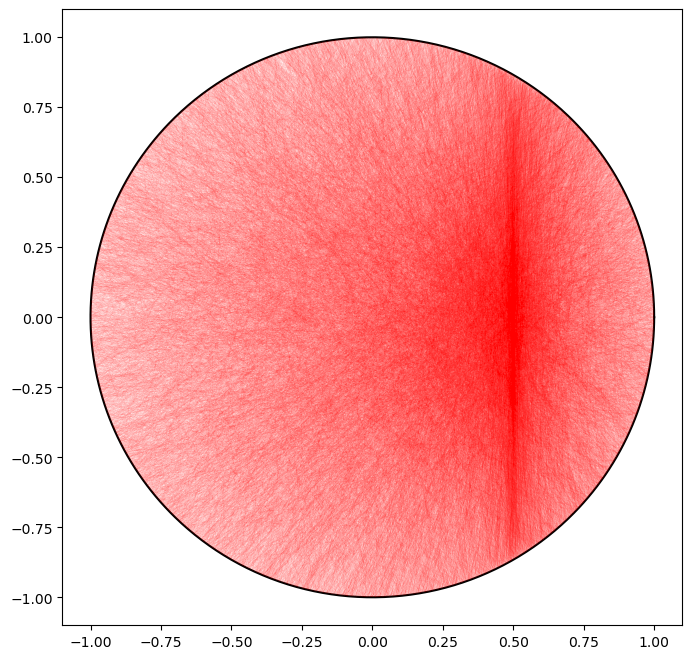

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

# count how many chords have lengths less than sqrt(3)
count = 0
for i in range(n):
    if chord_lengths[i] > np.sqrt(3):
        count += 1
    ax.plot([x1_list[i], x2_list[i]], [y1_list[i], y2_list[i]], 'r', linewidth=0.01)

print(f"Method 4 probability = {count/n}")
plt.show()